<a href="https://colab.research.google.com/github/B4Farouk/smpl-dr-clip/blob/main/SMPL_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install smplpytorch
!pip install chumpy
!git clone https://github.com/B4Farouk/smpl-dr-clip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58286 sha256=45f2b8b05eca38b9d23a45c272f5b077972d788db29553ac0aecb15f9df67f7d
  Stored in directory: /root/.cache/pip/wheels/59/68/de/5e0c5d77e573e8c150e69e07a25035e6b6a04952d6e1814dbc
Successfully built chumpy
Cloning into 'smpl-dr-clip'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 54 (delta 25), reused 22 (delta 5), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# plt.switch_backend('agg')


def display_model(
        model_info,
        model_faces=None,
        with_joints=False,
        kintree_table=None,
        ax=None,
        batch_idx=0,
        show=True,
        savepath=None):
    """
    Displays mesh batch_idx in batch of model_info, model_info as returned by
    generate_random_model
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    verts, joints = model_info['verts'][batch_idx], model_info['joints'][
        batch_idx]
    if model_faces is None:
        ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2], alpha=0.2)
    else:
        mesh = Poly3DCollection(verts[model_faces], alpha=0.2)
        face_color = (141 / 255, 184 / 255, 226 / 255)
        edge_color = (50 / 255, 50 / 255, 50 / 255)
        mesh.set_edgecolor(edge_color)
        mesh.set_facecolor(face_color)
        ax.add_collection3d(mesh)
    if with_joints:
        draw_skeleton(joints, kintree_table=kintree_table, ax=ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-0.7, 0.7)
    ax.set_zlim(-0.7, 0.7)
    ax.view_init(azim=-90, elev=100)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    if savepath:
        print('Saving figure at {}.'.format(savepath))
        plt.savefig(savepath, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()
    return mesh


def draw_skeleton(joints3D, kintree_table, ax=None, with_numbers=True):
    if ax is None:
        fig = plt.figure(frameon=False)
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = ax

    colors = []
    left_right_mid = ['r', 'g', 'b']
    kintree_colors = [2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1]
    for c in kintree_colors:
        colors += left_right_mid[c]
    # For each 24 joint
    for i in range(1, kintree_table.shape[1]):
        j1 = kintree_table[0][i]
        j2 = kintree_table[1][i]
        ax.plot([joints3D[j1, 0], joints3D[j2, 0]],
                [joints3D[j1, 1], joints3D[j2, 1]],
                [joints3D[j1, 2], joints3D[j2, 2]],
                color=colors[i], linestyle='-', linewidth=2, marker='o', markersize=5)
        if with_numbers:
            ax.text(joints3D[j2, 0], joints3D[j2, 1], joints3D[j2, 2], j2)
    return 

Saving figure at image.png.


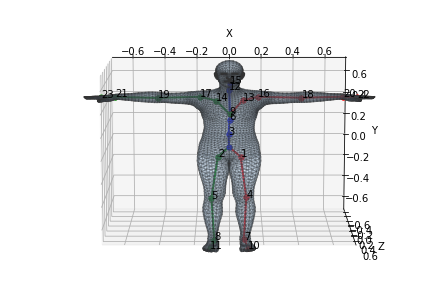

In [50]:
import torch

from smplpytorch.pytorch.smpl_layer import SMPL_Layer



batch_size = 1

# Create the SMPL layer
smpl_layer = SMPL_Layer(
center_idx=0,
gender='neutral',
model_root='/content/smpl-dr-clip')

# Generate T pose
pose_params = torch.zeros(batch_size, 72)
shape_params = torch.zeros(batch_size, 10)

# Forward from the SMPL layer

true_verts, true_Jtr = smpl_layer(pose_params, th_betas=shape_params)

# Draw output vertices and joints
display_model(
        {'verts': true_verts.cpu().detach(),
         'joints': true_Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

In [68]:
def mse_loss(x,y):
  return torch.sum(torch.sum(torch.square(x-y)))

def loss_function(true_verts,vertst):
  return mse_loss(true_verts,verts)


tensor(4713.7383, grad_fn=<SumBackward0>)
Saving figure at image.png.


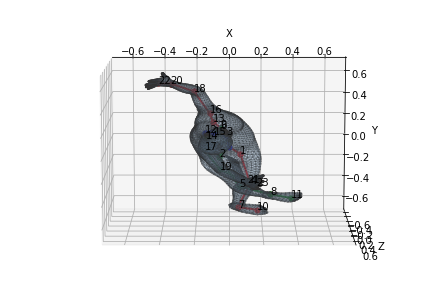

tensor(1753.8148, grad_fn=<SumBackward0>)
tensor(761.3801, grad_fn=<SumBackward0>)
tensor(472.7066, grad_fn=<SumBackward0>)
tensor(336.3668, grad_fn=<SumBackward0>)
tensor(265.0969, grad_fn=<SumBackward0>)
tensor(220.9927, grad_fn=<SumBackward0>)
tensor(189.7023, grad_fn=<SumBackward0>)
tensor(165.7448, grad_fn=<SumBackward0>)
tensor(146.6568, grad_fn=<SumBackward0>)
tensor(131.0788, grad_fn=<SumBackward0>)
tensor(118.1445, grad_fn=<SumBackward0>)
tensor(107.2602, grad_fn=<SumBackward0>)
tensor(98.0011, grad_fn=<SumBackward0>)
tensor(90.0549, grad_fn=<SumBackward0>)
tensor(83.1867, grad_fn=<SumBackward0>)
tensor(77.2153, grad_fn=<SumBackward0>)
tensor(71.9985, grad_fn=<SumBackward0>)
tensor(67.4227, grad_fn=<SumBackward0>)
tensor(63.3950, grad_fn=<SumBackward0>)
tensor(59.8393, grad_fn=<SumBackward0>)
tensor(56.6916, grad_fn=<SumBackward0>)
tensor(53.8981, grad_fn=<SumBackward0>)
tensor(51.4131, grad_fn=<SumBackward0>)
tensor(49.1974, grad_fn=<SumBackward0>)
tensor(47.2174, grad_fn=<Su

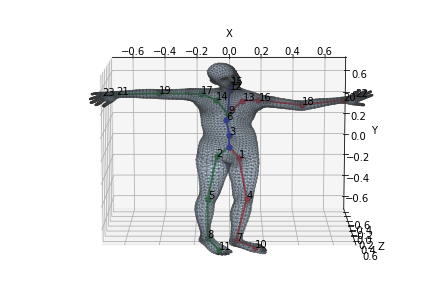

tensor(19.9555, grad_fn=<SumBackward0>)
tensor(19.8309, grad_fn=<SumBackward0>)
tensor(19.7075, grad_fn=<SumBackward0>)
tensor(19.5853, grad_fn=<SumBackward0>)
tensor(19.4642, grad_fn=<SumBackward0>)
tensor(19.3443, grad_fn=<SumBackward0>)
tensor(19.2254, grad_fn=<SumBackward0>)
tensor(19.1077, grad_fn=<SumBackward0>)
tensor(18.9910, grad_fn=<SumBackward0>)
tensor(18.8754, grad_fn=<SumBackward0>)
tensor(18.7609, grad_fn=<SumBackward0>)
tensor(18.6473, grad_fn=<SumBackward0>)
tensor(18.5348, grad_fn=<SumBackward0>)
tensor(18.4233, grad_fn=<SumBackward0>)
tensor(18.3129, grad_fn=<SumBackward0>)
tensor(18.2033, grad_fn=<SumBackward0>)
tensor(18.0948, grad_fn=<SumBackward0>)
tensor(17.9872, grad_fn=<SumBackward0>)
tensor(17.8805, grad_fn=<SumBackward0>)
tensor(17.7748, grad_fn=<SumBackward0>)
tensor(17.6700, grad_fn=<SumBackward0>)
tensor(17.5661, grad_fn=<SumBackward0>)
tensor(17.4631, grad_fn=<SumBackward0>)
tensor(17.3610, grad_fn=<SumBackward0>)
tensor(17.2598, grad_fn=<SumBackward0>)


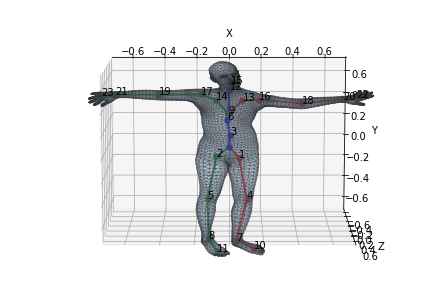

tensor(11.5098, grad_fn=<SumBackward0>)
tensor(11.4536, grad_fn=<SumBackward0>)
tensor(11.3978, grad_fn=<SumBackward0>)
tensor(11.3424, grad_fn=<SumBackward0>)
tensor(11.2874, grad_fn=<SumBackward0>)
tensor(11.2328, grad_fn=<SumBackward0>)
tensor(11.1786, grad_fn=<SumBackward0>)
tensor(11.1247, grad_fn=<SumBackward0>)
tensor(11.0711, grad_fn=<SumBackward0>)
tensor(11.0180, grad_fn=<SumBackward0>)
tensor(10.9652, grad_fn=<SumBackward0>)
tensor(10.9128, grad_fn=<SumBackward0>)
tensor(10.8607, grad_fn=<SumBackward0>)
tensor(10.8089, grad_fn=<SumBackward0>)
tensor(10.7575, grad_fn=<SumBackward0>)
tensor(10.7065, grad_fn=<SumBackward0>)
tensor(10.6558, grad_fn=<SumBackward0>)
tensor(10.6054, grad_fn=<SumBackward0>)
tensor(10.5554, grad_fn=<SumBackward0>)
tensor(10.5057, grad_fn=<SumBackward0>)
tensor(10.4564, grad_fn=<SumBackward0>)
tensor(10.4073, grad_fn=<SumBackward0>)
tensor(10.3586, grad_fn=<SumBackward0>)
tensor(10.3102, grad_fn=<SumBackward0>)
tensor(10.2622, grad_fn=<SumBackward0>)


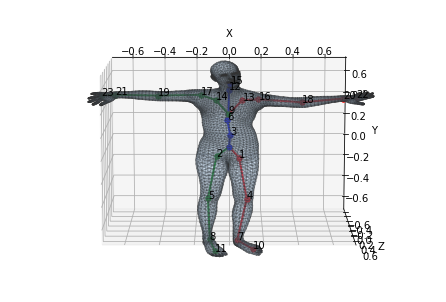

tensor(7.3695, grad_fn=<SumBackward0>)
tensor(7.3396, grad_fn=<SumBackward0>)
tensor(7.3098, grad_fn=<SumBackward0>)
tensor(7.2803, grad_fn=<SumBackward0>)
tensor(7.2509, grad_fn=<SumBackward0>)
tensor(7.2216, grad_fn=<SumBackward0>)
tensor(7.1926, grad_fn=<SumBackward0>)
tensor(7.1637, grad_fn=<SumBackward0>)
tensor(7.1350, grad_fn=<SumBackward0>)
tensor(7.1064, grad_fn=<SumBackward0>)
tensor(7.0780, grad_fn=<SumBackward0>)
tensor(7.0497, grad_fn=<SumBackward0>)
tensor(7.0216, grad_fn=<SumBackward0>)
tensor(6.9937, grad_fn=<SumBackward0>)
tensor(6.9660, grad_fn=<SumBackward0>)
tensor(6.9383, grad_fn=<SumBackward0>)
tensor(6.9109, grad_fn=<SumBackward0>)
tensor(6.8836, grad_fn=<SumBackward0>)
tensor(6.8564, grad_fn=<SumBackward0>)
tensor(6.8294, grad_fn=<SumBackward0>)
tensor(6.8026, grad_fn=<SumBackward0>)
tensor(6.7759, grad_fn=<SumBackward0>)
tensor(6.7494, grad_fn=<SumBackward0>)
tensor(6.7230, grad_fn=<SumBackward0>)
tensor(6.6967, grad_fn=<SumBackward0>)
tensor(6.6706, grad_fn=<S

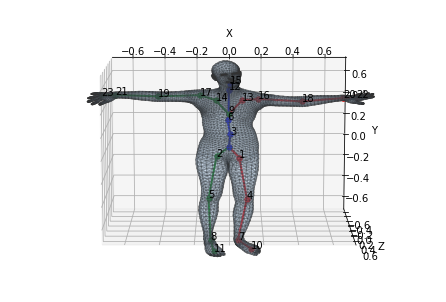

tensor(5.0636, grad_fn=<SumBackward0>)
tensor(5.0461, grad_fn=<SumBackward0>)
tensor(5.0287, grad_fn=<SumBackward0>)
tensor(5.0114, grad_fn=<SumBackward0>)
tensor(4.9941, grad_fn=<SumBackward0>)
tensor(4.9770, grad_fn=<SumBackward0>)
tensor(4.9600, grad_fn=<SumBackward0>)
tensor(4.9430, grad_fn=<SumBackward0>)
tensor(4.9261, grad_fn=<SumBackward0>)
tensor(4.9093, grad_fn=<SumBackward0>)
tensor(4.8926, grad_fn=<SumBackward0>)
tensor(4.8759, grad_fn=<SumBackward0>)
tensor(4.8594, grad_fn=<SumBackward0>)
tensor(4.8429, grad_fn=<SumBackward0>)
tensor(4.8265, grad_fn=<SumBackward0>)
tensor(4.8102, grad_fn=<SumBackward0>)
tensor(4.7940, grad_fn=<SumBackward0>)
tensor(4.7778, grad_fn=<SumBackward0>)
tensor(4.7618, grad_fn=<SumBackward0>)
tensor(4.7458, grad_fn=<SumBackward0>)
tensor(4.7299, grad_fn=<SumBackward0>)
tensor(4.7140, grad_fn=<SumBackward0>)
tensor(4.6983, grad_fn=<SumBackward0>)
tensor(4.6826, grad_fn=<SumBackward0>)
tensor(4.6670, grad_fn=<SumBackward0>)
tensor(4.6514, grad_fn=<S

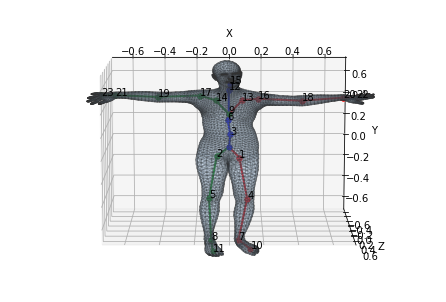

tensor(3.6726, grad_fn=<SumBackward0>)
tensor(3.6617, grad_fn=<SumBackward0>)
tensor(3.6508, grad_fn=<SumBackward0>)
tensor(3.6400, grad_fn=<SumBackward0>)
tensor(3.6292, grad_fn=<SumBackward0>)
tensor(3.6185, grad_fn=<SumBackward0>)
tensor(3.6078, grad_fn=<SumBackward0>)
tensor(3.5972, grad_fn=<SumBackward0>)
tensor(3.5866, grad_fn=<SumBackward0>)
tensor(3.5761, grad_fn=<SumBackward0>)
tensor(3.5656, grad_fn=<SumBackward0>)
tensor(3.5552, grad_fn=<SumBackward0>)
tensor(3.5448, grad_fn=<SumBackward0>)
tensor(3.5344, grad_fn=<SumBackward0>)
tensor(3.5241, grad_fn=<SumBackward0>)
tensor(3.5138, grad_fn=<SumBackward0>)
tensor(3.5036, grad_fn=<SumBackward0>)
tensor(3.4935, grad_fn=<SumBackward0>)
tensor(3.4833, grad_fn=<SumBackward0>)
tensor(3.4733, grad_fn=<SumBackward0>)
tensor(3.4632, grad_fn=<SumBackward0>)
tensor(3.4532, grad_fn=<SumBackward0>)
tensor(3.4433, grad_fn=<SumBackward0>)
tensor(3.4334, grad_fn=<SumBackward0>)
tensor(3.4235, grad_fn=<SumBackward0>)
tensor(3.4137, grad_fn=<S

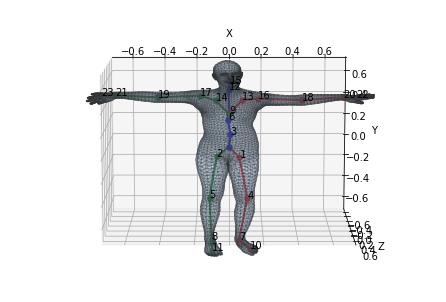

tensor(2.7837, grad_fn=<SumBackward0>)
tensor(2.7765, grad_fn=<SumBackward0>)
tensor(2.7694, grad_fn=<SumBackward0>)
tensor(2.7623, grad_fn=<SumBackward0>)
tensor(2.7552, grad_fn=<SumBackward0>)
tensor(2.7482, grad_fn=<SumBackward0>)
tensor(2.7412, grad_fn=<SumBackward0>)
tensor(2.7342, grad_fn=<SumBackward0>)
tensor(2.7272, grad_fn=<SumBackward0>)
tensor(2.7203, grad_fn=<SumBackward0>)
tensor(2.7134, grad_fn=<SumBackward0>)
tensor(2.7065, grad_fn=<SumBackward0>)
tensor(2.6997, grad_fn=<SumBackward0>)
tensor(2.6929, grad_fn=<SumBackward0>)
tensor(2.6861, grad_fn=<SumBackward0>)
tensor(2.6793, grad_fn=<SumBackward0>)
tensor(2.6726, grad_fn=<SumBackward0>)
tensor(2.6659, grad_fn=<SumBackward0>)
tensor(2.6592, grad_fn=<SumBackward0>)
tensor(2.6525, grad_fn=<SumBackward0>)
tensor(2.6459, grad_fn=<SumBackward0>)
tensor(2.6393, grad_fn=<SumBackward0>)
tensor(2.6327, grad_fn=<SumBackward0>)
tensor(2.6262, grad_fn=<SumBackward0>)
tensor(2.6196, grad_fn=<SumBackward0>)
tensor(2.6131, grad_fn=<S

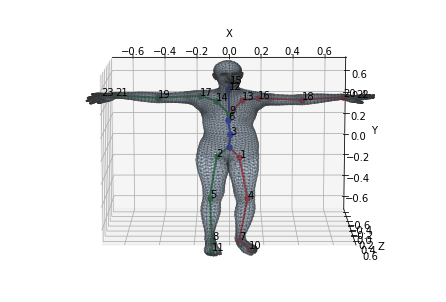

tensor(2.1903, grad_fn=<SumBackward0>)
tensor(2.1854, grad_fn=<SumBackward0>)
tensor(2.1806, grad_fn=<SumBackward0>)
tensor(2.1757, grad_fn=<SumBackward0>)
tensor(2.1709, grad_fn=<SumBackward0>)
tensor(2.1661, grad_fn=<SumBackward0>)
tensor(2.1613, grad_fn=<SumBackward0>)
tensor(2.1566, grad_fn=<SumBackward0>)
tensor(2.1518, grad_fn=<SumBackward0>)
tensor(2.1471, grad_fn=<SumBackward0>)
tensor(2.1424, grad_fn=<SumBackward0>)
tensor(2.1377, grad_fn=<SumBackward0>)
tensor(2.1330, grad_fn=<SumBackward0>)
tensor(2.1284, grad_fn=<SumBackward0>)
tensor(2.1237, grad_fn=<SumBackward0>)
tensor(2.1191, grad_fn=<SumBackward0>)
tensor(2.1145, grad_fn=<SumBackward0>)
tensor(2.1099, grad_fn=<SumBackward0>)
tensor(2.1053, grad_fn=<SumBackward0>)
tensor(2.1007, grad_fn=<SumBackward0>)
tensor(2.0962, grad_fn=<SumBackward0>)
tensor(2.0917, grad_fn=<SumBackward0>)
tensor(2.0872, grad_fn=<SumBackward0>)
tensor(2.0827, grad_fn=<SumBackward0>)
tensor(2.0782, grad_fn=<SumBackward0>)
tensor(2.0737, grad_fn=<S

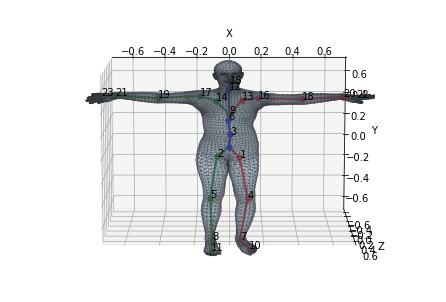

tensor(1.7802, grad_fn=<SumBackward0>)
tensor(1.7767, grad_fn=<SumBackward0>)
tensor(1.7733, grad_fn=<SumBackward0>)
tensor(1.7699, grad_fn=<SumBackward0>)
tensor(1.7665, grad_fn=<SumBackward0>)
tensor(1.7632, grad_fn=<SumBackward0>)
tensor(1.7598, grad_fn=<SumBackward0>)
tensor(1.7564, grad_fn=<SumBackward0>)
tensor(1.7531, grad_fn=<SumBackward0>)
tensor(1.7498, grad_fn=<SumBackward0>)
tensor(1.7464, grad_fn=<SumBackward0>)
tensor(1.7431, grad_fn=<SumBackward0>)
tensor(1.7398, grad_fn=<SumBackward0>)
tensor(1.7365, grad_fn=<SumBackward0>)
tensor(1.7333, grad_fn=<SumBackward0>)
tensor(1.7300, grad_fn=<SumBackward0>)
tensor(1.7267, grad_fn=<SumBackward0>)
tensor(1.7235, grad_fn=<SumBackward0>)
tensor(1.7203, grad_fn=<SumBackward0>)
tensor(1.7171, grad_fn=<SumBackward0>)
tensor(1.7138, grad_fn=<SumBackward0>)
tensor(1.7106, grad_fn=<SumBackward0>)
tensor(1.7075, grad_fn=<SumBackward0>)
tensor(1.7043, grad_fn=<SumBackward0>)
tensor(1.7011, grad_fn=<SumBackward0>)
tensor(1.6979, grad_fn=<S

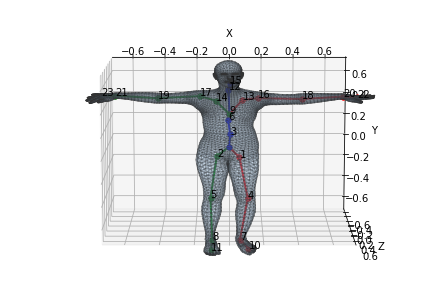

tensor(1.4881, grad_fn=<SumBackward0>)
tensor(1.4856, grad_fn=<SumBackward0>)
tensor(1.4831, grad_fn=<SumBackward0>)
tensor(1.4807, grad_fn=<SumBackward0>)
tensor(1.4782, grad_fn=<SumBackward0>)
tensor(1.4758, grad_fn=<SumBackward0>)
tensor(1.4733, grad_fn=<SumBackward0>)
tensor(1.4709, grad_fn=<SumBackward0>)
tensor(1.4685, grad_fn=<SumBackward0>)
tensor(1.4661, grad_fn=<SumBackward0>)
tensor(1.4637, grad_fn=<SumBackward0>)
tensor(1.4613, grad_fn=<SumBackward0>)
tensor(1.4589, grad_fn=<SumBackward0>)
tensor(1.4565, grad_fn=<SumBackward0>)
tensor(1.4541, grad_fn=<SumBackward0>)
tensor(1.4517, grad_fn=<SumBackward0>)
tensor(1.4494, grad_fn=<SumBackward0>)
tensor(1.4470, grad_fn=<SumBackward0>)
tensor(1.4447, grad_fn=<SumBackward0>)
tensor(1.4423, grad_fn=<SumBackward0>)
tensor(1.4400, grad_fn=<SumBackward0>)
tensor(1.4377, grad_fn=<SumBackward0>)
tensor(1.4354, grad_fn=<SumBackward0>)
tensor(1.4330, grad_fn=<SumBackward0>)
tensor(1.4307, grad_fn=<SumBackward0>)
tensor(1.4284, grad_fn=<S

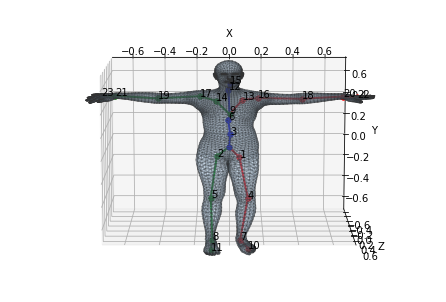

In [72]:
#SGD optimizer


# Generate random pose and shape parameters
pose_params = torch.rand(batch_size, 72)*0.5

pose_params.requires_grad_()
shape_params = torch.rand(batch_size, 10)*0.1
shape_params.requires_grad_()
# Forward from the SMPL layer
optimizer = torch.optim.SGD([pose_params, shape_params], lr=0.0001)
for i in range(1000):
  verts, Jtr = smpl_layer(pose_params, shape_params)

  loss=loss_function(true_verts,verts)
  print(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(i%100==0):
    display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)
# Draw output vertices and joints
display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

tensor(2570.7471, grad_fn=<SumBackward0>)
Saving figure at image.png.


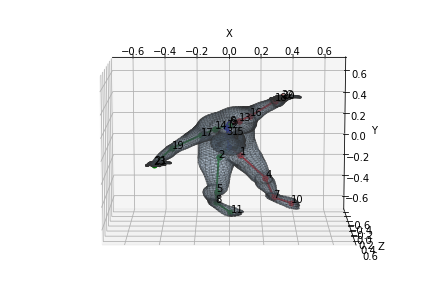

tensor(2548.9934, grad_fn=<SumBackward0>)
tensor(2527.3330, grad_fn=<SumBackward0>)
tensor(2505.7695, grad_fn=<SumBackward0>)
tensor(2484.3054, grad_fn=<SumBackward0>)
tensor(2462.9446, grad_fn=<SumBackward0>)
tensor(2441.6890, grad_fn=<SumBackward0>)
tensor(2420.5417, grad_fn=<SumBackward0>)
tensor(2399.5056, grad_fn=<SumBackward0>)
tensor(2378.5825, grad_fn=<SumBackward0>)
tensor(2357.7751, grad_fn=<SumBackward0>)
tensor(2337.0854, grad_fn=<SumBackward0>)
tensor(2316.5161, grad_fn=<SumBackward0>)
tensor(2296.0674, grad_fn=<SumBackward0>)
tensor(2275.7402, grad_fn=<SumBackward0>)
tensor(2255.5371, grad_fn=<SumBackward0>)
tensor(2235.4573, grad_fn=<SumBackward0>)
tensor(2215.5015, grad_fn=<SumBackward0>)
tensor(2195.6704, grad_fn=<SumBackward0>)
tensor(2175.9631, grad_fn=<SumBackward0>)
tensor(2156.3789, grad_fn=<SumBackward0>)
tensor(2136.9194, grad_fn=<SumBackward0>)
tensor(2117.5842, grad_fn=<SumBackward0>)
tensor(2098.3730, grad_fn=<SumBackward0>)
tensor(2079.2856, grad_fn=<SumBack

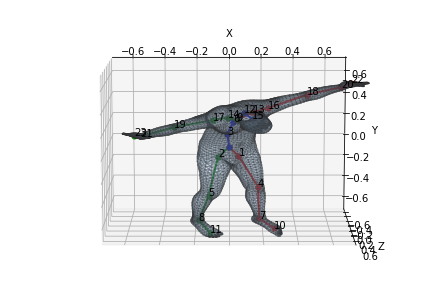

tensor(997.9601, grad_fn=<SumBackward0>)
tensor(988.4226, grad_fn=<SumBackward0>)
tensor(978.9724, grad_fn=<SumBackward0>)
tensor(969.6087, grad_fn=<SumBackward0>)
tensor(960.3301, grad_fn=<SumBackward0>)
tensor(951.1357, grad_fn=<SumBackward0>)
tensor(942.0246, grad_fn=<SumBackward0>)
tensor(932.9956, grad_fn=<SumBackward0>)
tensor(924.0479, grad_fn=<SumBackward0>)
tensor(915.1805, grad_fn=<SumBackward0>)
tensor(906.3927, grad_fn=<SumBackward0>)
tensor(897.6833, grad_fn=<SumBackward0>)
tensor(889.0519, grad_fn=<SumBackward0>)
tensor(880.4973, grad_fn=<SumBackward0>)
tensor(872.0184, grad_fn=<SumBackward0>)
tensor(863.6153, grad_fn=<SumBackward0>)
tensor(855.2860, grad_fn=<SumBackward0>)
tensor(847.0308, grad_fn=<SumBackward0>)
tensor(838.8483, grad_fn=<SumBackward0>)
tensor(830.7374, grad_fn=<SumBackward0>)
tensor(822.6982, grad_fn=<SumBackward0>)
tensor(814.7293, grad_fn=<SumBackward0>)
tensor(806.8306, grad_fn=<SumBackward0>)
tensor(799.0009, grad_fn=<SumBackward0>)
tensor(791.2396,

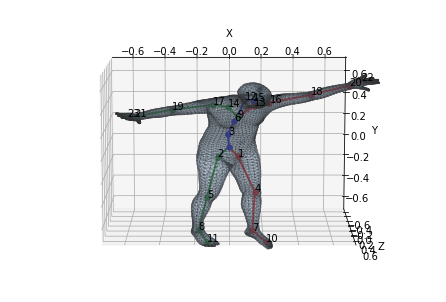

tensor(362.3165, grad_fn=<SumBackward0>)
tensor(358.4127, grad_fn=<SumBackward0>)
tensor(354.5465, grad_fn=<SumBackward0>)
tensor(350.7178, grad_fn=<SumBackward0>)
tensor(346.9265, grad_fn=<SumBackward0>)
tensor(343.1719, grad_fn=<SumBackward0>)
tensor(339.4541, grad_fn=<SumBackward0>)
tensor(335.7729, grad_fn=<SumBackward0>)
tensor(332.1279, grad_fn=<SumBackward0>)
tensor(328.5188, grad_fn=<SumBackward0>)
tensor(324.9456, grad_fn=<SumBackward0>)
tensor(321.4078, grad_fn=<SumBackward0>)
tensor(317.9053, grad_fn=<SumBackward0>)
tensor(314.4379, grad_fn=<SumBackward0>)
tensor(311.0053, grad_fn=<SumBackward0>)
tensor(307.6073, grad_fn=<SumBackward0>)
tensor(304.2435, grad_fn=<SumBackward0>)
tensor(300.9138, grad_fn=<SumBackward0>)
tensor(297.6180, grad_fn=<SumBackward0>)
tensor(294.3560, grad_fn=<SumBackward0>)
tensor(291.1271, grad_fn=<SumBackward0>)
tensor(287.9314, grad_fn=<SumBackward0>)
tensor(284.7687, grad_fn=<SumBackward0>)
tensor(281.6386, grad_fn=<SumBackward0>)
tensor(278.5410,

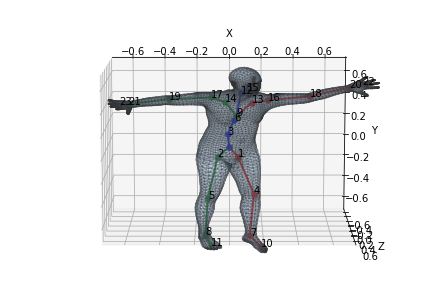

tensor(120.6456, grad_fn=<SumBackward0>)
tensor(119.3717, grad_fn=<SumBackward0>)
tensor(118.1136, grad_fn=<SumBackward0>)
tensor(116.8710, grad_fn=<SumBackward0>)
tensor(115.6437, grad_fn=<SumBackward0>)
tensor(114.4315, grad_fn=<SumBackward0>)
tensor(113.2344, grad_fn=<SumBackward0>)
tensor(112.0521, grad_fn=<SumBackward0>)
tensor(110.8845, grad_fn=<SumBackward0>)
tensor(109.7312, grad_fn=<SumBackward0>)
tensor(108.5924, grad_fn=<SumBackward0>)
tensor(107.4677, grad_fn=<SumBackward0>)
tensor(106.3569, grad_fn=<SumBackward0>)
tensor(105.2601, grad_fn=<SumBackward0>)
tensor(104.1768, grad_fn=<SumBackward0>)
tensor(103.1070, grad_fn=<SumBackward0>)
tensor(102.0506, grad_fn=<SumBackward0>)
tensor(101.0073, grad_fn=<SumBackward0>)
tensor(99.9770, grad_fn=<SumBackward0>)
tensor(98.9597, grad_fn=<SumBackward0>)
tensor(97.9550, grad_fn=<SumBackward0>)
tensor(96.9628, grad_fn=<SumBackward0>)
tensor(95.9831, grad_fn=<SumBackward0>)
tensor(95.0157, grad_fn=<SumBackward0>)
tensor(94.0603, grad_f

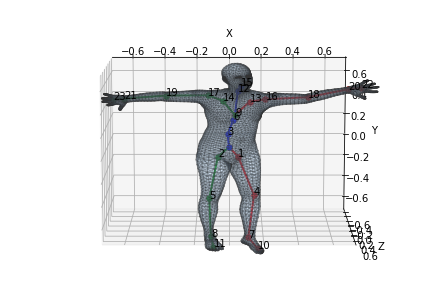

tensor(47.5250, grad_fn=<SumBackward0>)
tensor(47.1572, grad_fn=<SumBackward0>)
tensor(46.7938, grad_fn=<SumBackward0>)
tensor(46.4347, grad_fn=<SumBackward0>)
tensor(46.0798, grad_fn=<SumBackward0>)
tensor(45.7290, grad_fn=<SumBackward0>)
tensor(45.3825, grad_fn=<SumBackward0>)
tensor(45.0400, grad_fn=<SumBackward0>)
tensor(44.7015, grad_fn=<SumBackward0>)
tensor(44.3670, grad_fn=<SumBackward0>)
tensor(44.0364, grad_fn=<SumBackward0>)
tensor(43.7097, grad_fn=<SumBackward0>)
tensor(43.3867, grad_fn=<SumBackward0>)
tensor(43.0676, grad_fn=<SumBackward0>)
tensor(42.7521, grad_fn=<SumBackward0>)
tensor(42.4403, grad_fn=<SumBackward0>)
tensor(42.1321, grad_fn=<SumBackward0>)
tensor(41.8275, grad_fn=<SumBackward0>)
tensor(41.5264, grad_fn=<SumBackward0>)
tensor(41.2288, grad_fn=<SumBackward0>)
tensor(40.9345, grad_fn=<SumBackward0>)
tensor(40.6437, grad_fn=<SumBackward0>)
tensor(40.3562, grad_fn=<SumBackward0>)
tensor(40.0720, grad_fn=<SumBackward0>)
tensor(39.7910, grad_fn=<SumBackward0>)


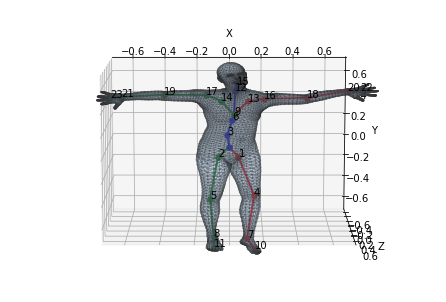

tensor(25.4035, grad_fn=<SumBackward0>)
tensor(25.2802, grad_fn=<SumBackward0>)
tensor(25.1582, grad_fn=<SumBackward0>)
tensor(25.0374, grad_fn=<SumBackward0>)
tensor(24.9177, grad_fn=<SumBackward0>)
tensor(24.7992, grad_fn=<SumBackward0>)
tensor(24.6819, grad_fn=<SumBackward0>)
tensor(24.5658, grad_fn=<SumBackward0>)
tensor(24.4507, grad_fn=<SumBackward0>)
tensor(24.3368, grad_fn=<SumBackward0>)
tensor(24.2240, grad_fn=<SumBackward0>)
tensor(24.1122, grad_fn=<SumBackward0>)
tensor(24.0016, grad_fn=<SumBackward0>)
tensor(23.8919, grad_fn=<SumBackward0>)
tensor(23.7834, grad_fn=<SumBackward0>)
tensor(23.6759, grad_fn=<SumBackward0>)
tensor(23.5694, grad_fn=<SumBackward0>)
tensor(23.4639, grad_fn=<SumBackward0>)
tensor(23.3595, grad_fn=<SumBackward0>)
tensor(23.2560, grad_fn=<SumBackward0>)
tensor(23.1535, grad_fn=<SumBackward0>)
tensor(23.0520, grad_fn=<SumBackward0>)
tensor(22.9514, grad_fn=<SumBackward0>)
tensor(22.8518, grad_fn=<SumBackward0>)
tensor(22.7531, grad_fn=<SumBackward0>)


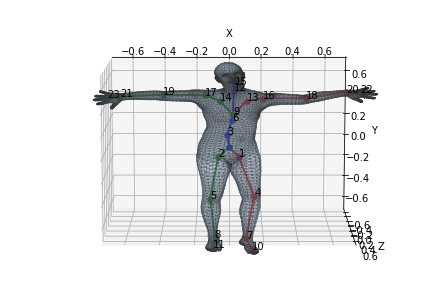

tensor(17.3174, grad_fn=<SumBackward0>)
tensor(17.2661, grad_fn=<SumBackward0>)
tensor(17.2152, grad_fn=<SumBackward0>)
tensor(17.1647, grad_fn=<SumBackward0>)
tensor(17.1145, grad_fn=<SumBackward0>)
tensor(17.0647, grad_fn=<SumBackward0>)
tensor(17.0153, grad_fn=<SumBackward0>)
tensor(16.9662, grad_fn=<SumBackward0>)
tensor(16.9176, grad_fn=<SumBackward0>)
tensor(16.8692, grad_fn=<SumBackward0>)
tensor(16.8212, grad_fn=<SumBackward0>)
tensor(16.7736, grad_fn=<SumBackward0>)
tensor(16.7263, grad_fn=<SumBackward0>)
tensor(16.6793, grad_fn=<SumBackward0>)
tensor(16.6327, grad_fn=<SumBackward0>)
tensor(16.5864, grad_fn=<SumBackward0>)
tensor(16.5405, grad_fn=<SumBackward0>)
tensor(16.4948, grad_fn=<SumBackward0>)
tensor(16.4496, grad_fn=<SumBackward0>)
tensor(16.4045, grad_fn=<SumBackward0>)
tensor(16.3599, grad_fn=<SumBackward0>)
tensor(16.3155, grad_fn=<SumBackward0>)
tensor(16.2715, grad_fn=<SumBackward0>)
tensor(16.2277, grad_fn=<SumBackward0>)
tensor(16.1843, grad_fn=<SumBackward0>)


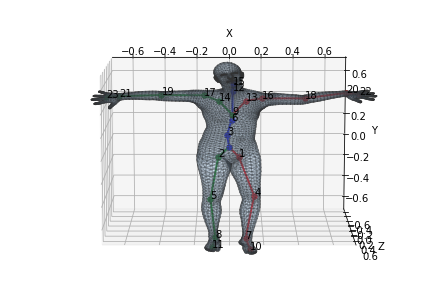

tensor(13.5652, grad_fn=<SumBackward0>)
tensor(13.5376, grad_fn=<SumBackward0>)
tensor(13.5102, grad_fn=<SumBackward0>)
tensor(13.4829, grad_fn=<SumBackward0>)
tensor(13.4557, grad_fn=<SumBackward0>)
tensor(13.4287, grad_fn=<SumBackward0>)
tensor(13.4018, grad_fn=<SumBackward0>)
tensor(13.3750, grad_fn=<SumBackward0>)
tensor(13.3484, grad_fn=<SumBackward0>)
tensor(13.3219, grad_fn=<SumBackward0>)
tensor(13.2955, grad_fn=<SumBackward0>)
tensor(13.2692, grad_fn=<SumBackward0>)
tensor(13.2431, grad_fn=<SumBackward0>)
tensor(13.2171, grad_fn=<SumBackward0>)
tensor(13.1912, grad_fn=<SumBackward0>)
tensor(13.1654, grad_fn=<SumBackward0>)
tensor(13.1397, grad_fn=<SumBackward0>)
tensor(13.1142, grad_fn=<SumBackward0>)
tensor(13.0888, grad_fn=<SumBackward0>)
tensor(13.0635, grad_fn=<SumBackward0>)
tensor(13.0383, grad_fn=<SumBackward0>)
tensor(13.0133, grad_fn=<SumBackward0>)
tensor(12.9883, grad_fn=<SumBackward0>)
tensor(12.9635, grad_fn=<SumBackward0>)
tensor(12.9388, grad_fn=<SumBackward0>)


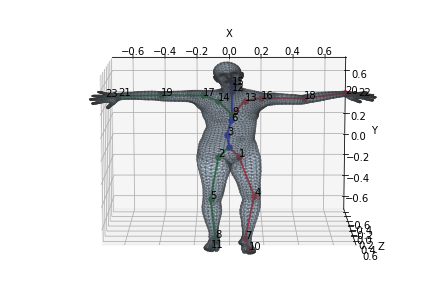

tensor(11.3263, grad_fn=<SumBackward0>)
tensor(11.3079, grad_fn=<SumBackward0>)
tensor(11.2897, grad_fn=<SumBackward0>)
tensor(11.2715, grad_fn=<SumBackward0>)
tensor(11.2533, grad_fn=<SumBackward0>)
tensor(11.2352, grad_fn=<SumBackward0>)
tensor(11.2172, grad_fn=<SumBackward0>)
tensor(11.1992, grad_fn=<SumBackward0>)
tensor(11.1813, grad_fn=<SumBackward0>)
tensor(11.1634, grad_fn=<SumBackward0>)
tensor(11.1456, grad_fn=<SumBackward0>)
tensor(11.1279, grad_fn=<SumBackward0>)
tensor(11.1102, grad_fn=<SumBackward0>)
tensor(11.0926, grad_fn=<SumBackward0>)
tensor(11.0750, grad_fn=<SumBackward0>)
tensor(11.0575, grad_fn=<SumBackward0>)
tensor(11.0401, grad_fn=<SumBackward0>)
tensor(11.0227, grad_fn=<SumBackward0>)
tensor(11.0053, grad_fn=<SumBackward0>)
tensor(10.9881, grad_fn=<SumBackward0>)
tensor(10.9708, grad_fn=<SumBackward0>)
tensor(10.9537, grad_fn=<SumBackward0>)
tensor(10.9365, grad_fn=<SumBackward0>)
tensor(10.9195, grad_fn=<SumBackward0>)
tensor(10.9025, grad_fn=<SumBackward0>)


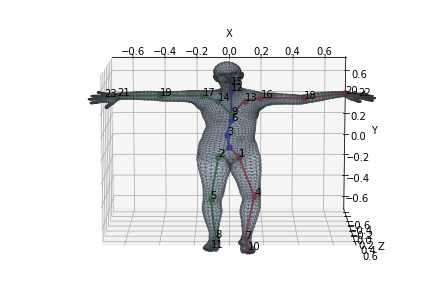

tensor(9.7479, grad_fn=<SumBackward0>)
tensor(9.7344, grad_fn=<SumBackward0>)
tensor(9.7208, grad_fn=<SumBackward0>)
tensor(9.7073, grad_fn=<SumBackward0>)
tensor(9.6938, grad_fn=<SumBackward0>)
tensor(9.6804, grad_fn=<SumBackward0>)
tensor(9.6669, grad_fn=<SumBackward0>)
tensor(9.6536, grad_fn=<SumBackward0>)
tensor(9.6402, grad_fn=<SumBackward0>)
tensor(9.6269, grad_fn=<SumBackward0>)
tensor(9.6137, grad_fn=<SumBackward0>)
tensor(9.6004, grad_fn=<SumBackward0>)
tensor(9.5872, grad_fn=<SumBackward0>)
tensor(9.5741, grad_fn=<SumBackward0>)
tensor(9.5609, grad_fn=<SumBackward0>)
tensor(9.5478, grad_fn=<SumBackward0>)
tensor(9.5348, grad_fn=<SumBackward0>)
tensor(9.5218, grad_fn=<SumBackward0>)
tensor(9.5088, grad_fn=<SumBackward0>)
tensor(9.4958, grad_fn=<SumBackward0>)
tensor(9.4829, grad_fn=<SumBackward0>)
tensor(9.4700, grad_fn=<SumBackward0>)
tensor(9.4572, grad_fn=<SumBackward0>)
tensor(9.4444, grad_fn=<SumBackward0>)
tensor(9.4316, grad_fn=<SumBackward0>)
tensor(9.4188, grad_fn=<S

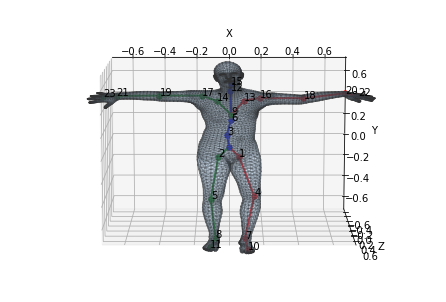

In [74]:
#Adam local minimum


# Generate random pose and shape parameters
pose_params = torch.rand(batch_size, 72)*0.5

pose_params.requires_grad_()
shape_params = torch.rand(batch_size, 10)*0.1
shape_params.requires_grad_()
# Forward from the SMPL layer
optimizer = torch.optim.Adam([pose_params, shape_params], lr=0.001)
for i in range(1000):
  verts, Jtr = smpl_layer(pose_params, shape_params)

  loss=loss_function(true_verts,verts)
  print(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(i%100==0):
    display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)
# Draw output vertices and joints
display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

In [7]:
def SMPL(Beta,Theta):
  verts, Jtr=smpl_layer(Beta,Theta)
  return verts


In [8]:

import torch

from smplpytorch.pytorch.smpl_layer import SMPL_Layer


def mesh_generation():

  cuda = False
  batch_size = 1

  # Create the SMPL layer
  smpl_layer = SMPL_Layer(
  center_idx=0,
  gender='neutral',
  model_root='/content/smpl-dr-clip')

  # Generate random pose and shape parameters
  for i in range(5):
    pose_params = torch.rand(batch_size, 72) * (0.2-i*0.1)
    shape_params = torch.rand(batch_size, 10) * 0.03

      # GPU mode
    if cuda:
      pose_params = pose_params.cuda()
      shape_params = shape_params.cuda()
      smpl_layer.cuda()

    # Forward from the SMPL layer

    true_verts, true_Jtr = smpl_layer(pose_params, th_betas=shape_params)
    torch.save(true_verts,"verts_"+str(i)+'.pt')
    torch.save(true_verts,"Jtr_"+str(i)+'.pt')
